# Non-dimensionalisation of parameter sets

This notebook will cover:

* Non-dimensionalisation of parameter sets
* Re-dimensionalising solutions

In [1]:
import ucompress as uc
import matplotlib.pyplot as plt

## Simulations with non-dimensional parameters

Using non-dimensional parameters can improve solver performance, leading to faster simulations.  All of the example parameter sets contain methods for non-dimensionalising them using the `nondim` argument

In [5]:
pars = uc.parameters.example_parameters.NeoHookean(nondim = True)

Printing the parameter object now shows information about the non-dimensional parameter set

In [6]:
print(pars)

Dimensional parameter values
---------------------------------------
R = 5.00e-03
E_m = 5.00e+04
nu_m = 0.00e+00
k_0 = 2.00e-13
phi_0 = 8.00e-01
lam_z = 5.00e-01
beta_r = 1.00e+00
beta_z = 1.00e+00
F = -1.00e+00
t_start = 1.00e-01
t_end = 1.00e+04

Non-dimensional parameter values
-----------------------------------------
R = 1.00e+00
E_m = 1.00e+00
nu_m = 0.00e+00
k_0 = 1.00e+00
phi_0 = 8.00e-01
lam_z = 5.00e-01
beta_r = 1.00e+00
beta_z = 1.00e+00
F = -8.00e-01
t_start = 4.00e-05
t_end = 4.00e+00

Computational parameter values
-----------------------------------------
N = 40
Nt = 200
t_spacing = log



We will now carry out a displacement-controlled experiment.  The material will be a neo-Hookean poroelastic material with constant permeability.

In [8]:
mech = uc.mechanics.NeoHookean()
perm = uc.permeability.Constant()

We can build a new model using the same code as above and run the simulation

In [16]:
# Build the model
model = uc.base_models.Poroelastic(mechanics = mech,
                                   permeability = perm,
                                   parameters = pars)

# Define the experiment
experiment = uc.experiments.DisplacementControlled(model, pars)

# Solve
sol = experiment.transient_response()

--------------------------------
Transient step
Solver converged
Average number of Newton iterations per time step: 2.1


The solution can be re-dimensionalised using the `redimensionalise` method and passing the parameters object

In [17]:
# Re-dimensionalise the solution
sol.redimensionalise(pars)

The solution can then be visualised as in Notebook 02.  Here, we plot the force as a function of time

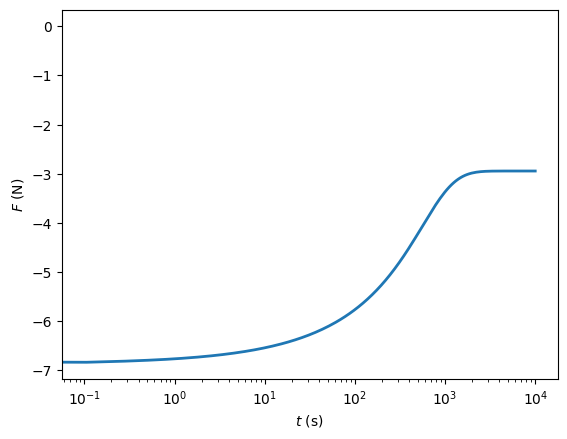

In [19]:
plt.semilogx(sol.t, sol.F, lw = 2)
plt.xlabel('$t$ (s)')
plt.ylabel('$F$ (N)')
plt.show()